In [ ]:
Student ID: 260570652, Name: Luke Steverango

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.misc
from PIL import Image

The following piece of code defines the iteration map 

$$\phi(z)=z-\frac{z^3-1}{3z^2}$$

of the Newton-Raphson method for the equation $z^3-1=0$. In addition, the three roots are specified, and a color for each of the roots is chosen.

In [24]:
#Newton-Raphson iteration for z**3-1=0
def phi(z):
    z=complex(z)
    return z+(1/(z*z)-z)/3
#cubic roots of 1
zz=[1,complex(-.5,.5*np.sqrt(3)),complex(-.5,-.5*np.sqrt(3))]
#corresponding colors
cc=[[0.5,0,0],[0.5,1,.5],[0,0.5,1]]

We consider the rectangle $(x_{\textrm{min}},x_{\textrm{max}})\times(y_{\textrm{min}},y_{\textrm{max}})$ in the $z$-plane, and superimpose on it a grid of size $\texttt{imgx}\times\texttt{imgy}$. From each grid point, we start the Newton-Raphson iteration, and depending on the root it converges to, we color the point. Convergence is deemed to occur if the cuurent iterand is within $\varepsilon$ distance of a root. In case the iteration takes too long (i.e., $\texttt{iteration number} > \texttt{maxit}$), or division by zero occurs, we leave the point uncolored (black). We also shade the colors in such a way that darker regions correspond to points that need more iterations to converge to a root.

ValueError: Floating point image RGB values must be in the 0..1 range.

C:\Users\Luke\Anaconda3\lib\site-packages\ipykernel_launcher.py:39: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.


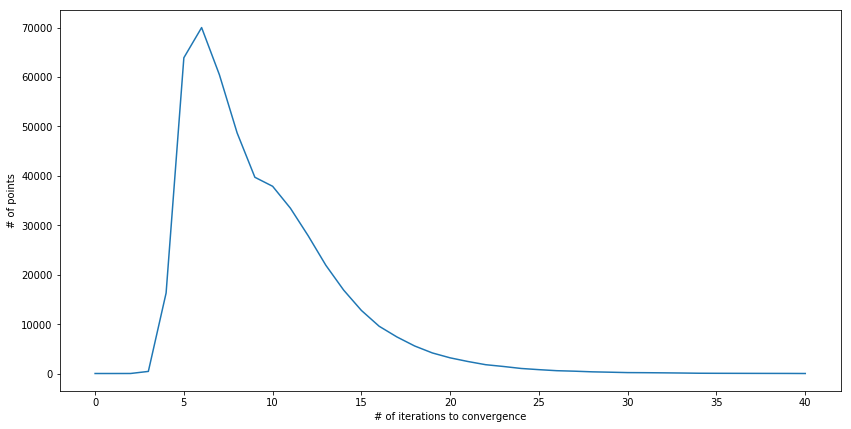

In [11]:
xmin = 0
xmax = 0.5
ymin = -0.75
ymax = -0.50
eps = .0001
maxit = 40
imgx = 700
imgy = 700
img = np.zeros((imgy,imgx,3))
a = (xmax-xmin)/imgx
b = (ymax-ymin)/imgy
h = np.zeros(maxit+1)
sit=20
f = 1./sit
for i in range(imgy):
    for j in range(imgx):
        x=xmin+a*j
        y=ymax-b*i
        z0=complex(x,y)
        for k in range(maxit):
            if abs(z0)<eps:
                h[maxit]+=1
                break
            z=phi(z0)
            con=False
            for l in range(len(zz)):
                if abs(z-zz[l])<eps:
                    con=True
                    break
            if(con):
                img[i,j]=[(sit-k)*f*c for c in cc[l]]
                h[k]+=1
                break
            z0=z
        if k==maxit: h[maxit]+=1
plt.figure(figsize=(15,15))
plt.imshow(img,extent=[xmin,xmax,ymin,ymax])
plt.show()
scipy.misc.imsave('Plot2.png', img)
plt.figure(figsize=(14,7))
plt.plot(range(maxit+1),h)
plt.xlabel('# of iterations to convergence')
plt.ylabel('# of points')
plt.show()

Q2:Part 1:
Why is there a large monochromatic region around each of the roots?
The large monochromatic region around each of the roots is due to the decently good guesses or approximations. If the initial guess is near a zero, then due to the N-R's good properties for most guesses, it will find the roots relatively easy.

Q2:Part 2:
The reason for the fractals forming, is due to bad guesses at the roots of the function. If you take a guess such that you satisfy $f'(z) \approx 0$, then the N-R method will cause the next intersection with the x-axis to go far away from the root, shooting out far in the complex plane. This results in a fractal pattern, as a small region leading to a mapping of the next iterate far away is exactly the concept presented in a self-similar fractal.

The following piece of code defines the iteration map 

$$\phi(z)=z-\frac{z^4 + z^2 + 1}{4z^3 + 2z}$$

of the Newton-Raphson method for the equation $z^4 + z^2 + 1 = 0$. In addition, the four roots are specified, and a color for each of the roots is chosen.

In [69]:
#Newton-Raphson iteration for z**4 + z**2 + 1 = 0
def newphi(z):
    z=complex(z)
    return (3*z*z*z*z + z*z - 1)/(2*(2*z*z*z + z)) 
#quartic roots          
zz=[complex(-.5,-.5*np.sqrt(3)),complex(.5,.5*np.sqrt(3)),complex(.5,-.5*np.sqrt(3)),complex(-.5,.5*np.sqrt(3))]
#corresponding colors
cc=[[0.5,0,0],[0.5,1,.5],[0,0.5,1],[0.25,0.5,0.5]]

ValueError: Floating point image RGB values must be in the 0..1 range.

C:\Users\Luke\Anaconda3\lib\site-packages\ipykernel_launcher.py:39: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.


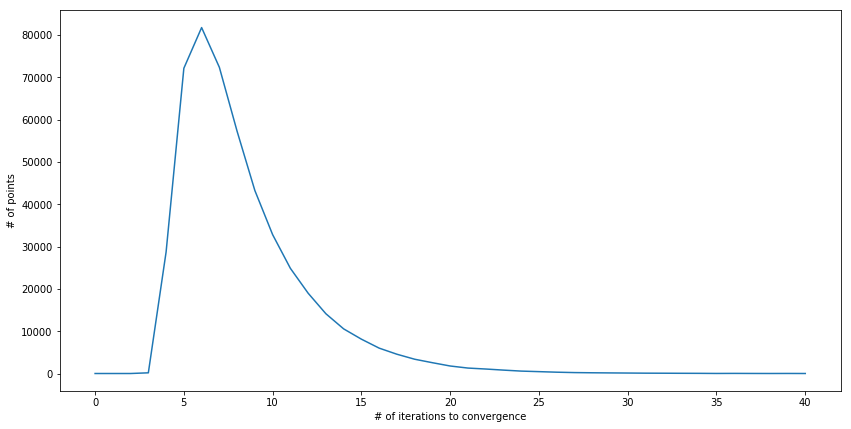

In [18]:
xmin = -0.25
xmax = 0.25
ymin = -0.75
ymax = 0
eps = .0001
maxit = 40
imgx = 700
imgy = 700
img = np.zeros((imgy,imgx,3))
a = (xmax-xmin)/imgx
b = (ymax-ymin)/imgy
h = np.zeros(maxit+1)
sit=20
f = 1./sit
for i in range(imgy):
    for j in range(imgx):
        x=xmin+a*j
        y=ymax-b*i
        z0=complex(x,y)
        for k in range(maxit):
            if abs(z0)<eps:
                h[maxit]+=1
                break
            z=newphi(z0)
            con=False
            for l in range(len(zz)):
                if abs(z-zz[l])<eps:
                    con=True
                    break
            if(con):
                img[i,j]=[(sit-k)*f*c for c in cc[l]]
                h[k]+=1
                break
            z0=z
        if k==maxit: h[maxit]+=1
plt.figure(figsize=(15,15))
plt.imshow(img,extent=[xmin,xmax,ymin,ymax])
plt.show()
scipy.misc.imsave('Plot4.png', img)
plt.figure(figsize=(14,7))
plt.plot(range(maxit+1),h)
plt.xlabel('# of iterations to convergence')
plt.ylabel('# of points')
plt.show()

Q2: Part 3 We see the same behaviour as exhibited before, but for a different area entirely. Again, the monochromatic regions imply that the point was a decently good assumption for location of a fixed point, and the convergence was rapid. The fractals were regions that were poor approximations.

The following piece of code defines the iteration map 

$$\phi(z)=z-\frac{\omega f(z)^2}{f(z + \omega f(z)) - f(z)}$$

of the Steffensen method for the equation $z^3 - 1 = 0$. In addition, the three roots are specified, and a color for each of the roots is chosen.

In [67]:
#Steffenson's iteration for z**3 - 1 = 0
def poly(z):
    return z*z*z - 1
def newphi(z):
    z=complex(z)
    omega = 5
    top = omega*poly(z)*poly(z)
    bottom = poly(z + omega*poly(z)) - poly(z)
    return top / bottom
    #return (omega((z*(z*z*z - 1)**6) + 2*(z**2)*((z**3 - 1)**3 - z**6 - 2*z**3 + 1)) + z**3)/(omega*(z(**3 - 1)**6 + 2*(z**2)*((z**3 - 1)**3 - z**6 - 2*z**3 + 1)) + z**3)

#cubic roots of z**3 - 1 = 0         
zz=[1,complex(-.5,.5*np.sqrt(3)),complex(-.5,-.5*np.sqrt(3))]
#corresponding colors
cc=[[0.5,0,0],[0.5,1,.5],[0,0.5,1]]

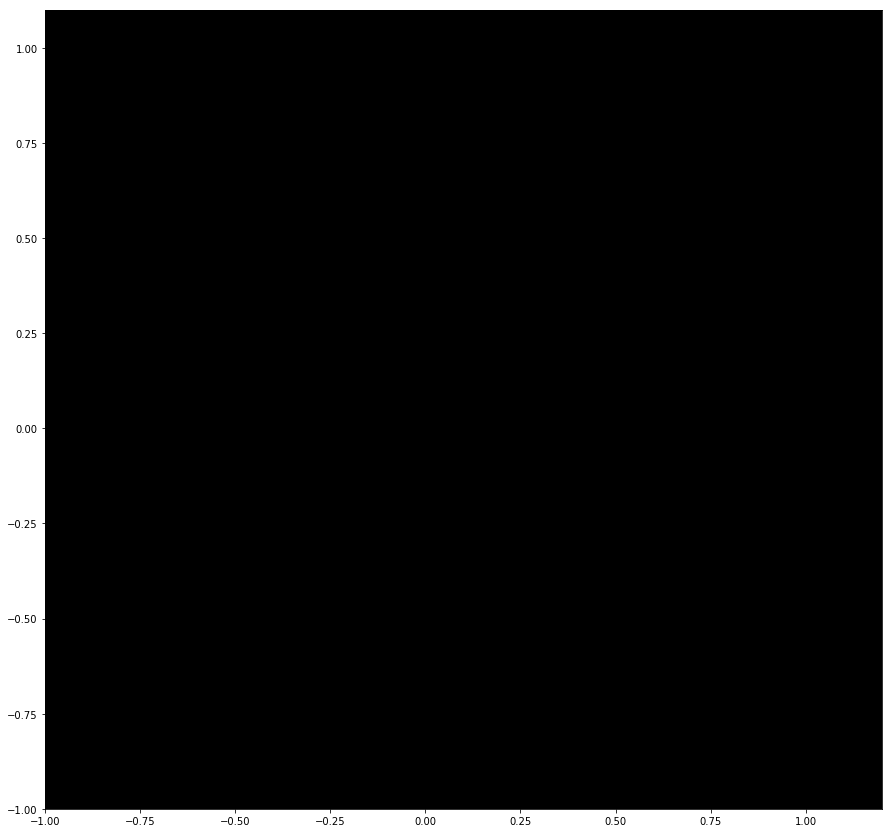

C:\Users\Luke\Anaconda3\lib\site-packages\ipykernel_launcher.py:39: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.


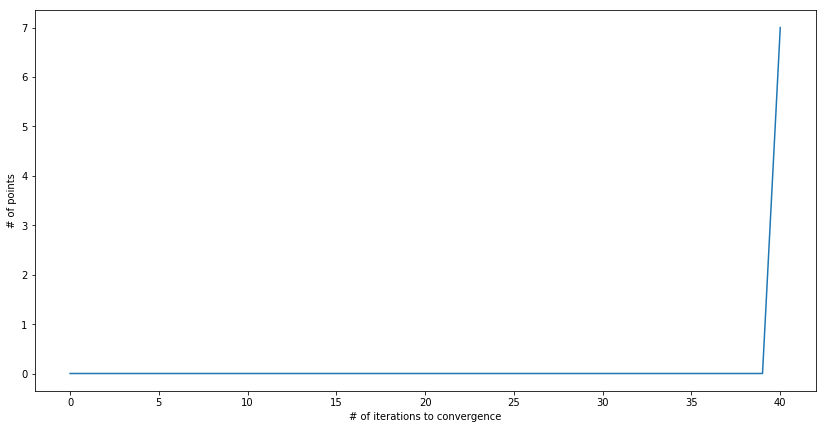

In [68]:
xmin = -1
xmax = 1.2
ymin = -1
ymax = 1.1
eps = .0001
maxit = 40
imgx = 700
imgy = 700
img = np.zeros((imgy,imgx,3))
a = (xmax-xmin)/imgx
b = (ymax-ymin)/imgy
h = np.zeros(maxit+1)
sit=20
f = 1./sit
for i in range(imgy):
    for j in range(imgx):
        x=xmin+a*j
        y=ymax-b*i
        z0=complex(x,y)
        for k in range(maxit):
            if abs(z0)<eps:
                h[maxit]+=1
                break
            z=newphi(z0)
            con=False
            for l in range(len(zz)):
                if abs(z-zz[l])<eps:
                    con=True
                    break
            if(con):
                img[i,j]=[(sit-k)*f*c for c in cc[l]]
                h[k]+=1
                break
            z0=z
        if k==maxit: h[maxit]+=1
plt.figure(figsize=(15,15))
plt.imshow(img,extent=[xmin,xmax,ymin,ymax])
plt.show()
scipy.misc.imsave('Plot5.png', img)
plt.figure(figsize=(14,7))
plt.plot(range(maxit+1),h)
plt.xlabel('# of iterations to convergence')
plt.ylabel('# of points')
plt.show()

I have sadly been unable to run the code successfully over many different omegas and different functions. As for Question 2: Part 5, I frankly do not know.